In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import numpy as np
import torch
from matplotlib import pylab as plt
print(torch.cuda.device_count())
device = torch.device('cuda')

1


In [0]:
dataroot = "/content/drive/My Drive/Colab Notebooks/burgers/data/"

In [0]:
data = np.load(dataroot+"heat.npz")

In [0]:
model = torch.nn.Sequential(
    torch.nn.Conv1d(1,15,3),
    torch.nn.ReLU(),
    torch.nn.Conv1d(15,15,1),
    torch.nn.ReLU(),
    torch.nn.Conv1d(15,15,1),
    torch.nn.ReLU(),
    torch.nn.Conv1d(15,1,1)
)
loss = torch.nn.MSELoss()

In [0]:
model = torch.nn.Sequential(
    torch.nn.Conv1d(1,1,3),
)
loss = torch.nn.MSELoss()

In [9]:
ll=list(model.parameters())
ll

[Parameter containing:
 tensor([[[0.3035, 0.3241, 0.0589]]], requires_grad=True),
 Parameter containing:
 tensor([-0.4128], requires_grad=True)]

In [0]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [0]:
count_parameters(model)

4

In [0]:
dataset = torch.tensor(data['U'],dtype=torch.float32,device=device)

In [0]:
Ntraj, Nt, Nx = dataset.shape

In [0]:
def select_batch_idcs(num):
    ii = torch.LongTensor([(np.random.choice(Ntraj), np.random.choice(Nt-1))
                               for _ in range(num)])
    return ii
def get_batch(num):
    ii = select_batch_idcs(num)
    xx = torch.cat([dataset[j,(t,),:].unsqueeze(0) for j,t in ii])
    yy = torch.cat([dataset[j,(t+1,),:].unsqueeze(0) for j,t in ii])
    return xx,yy

In [0]:
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [15]:
model = model.to(device)
Nepoch = 1000
Nbatch = 20
Nprint = 100
for e in range(Nepoch*Nbatch):
    xx,yy=get_batch(Nbatch)
    y_pred = model(xx)+xx[:,:,1:-1]
    L = loss(y_pred,yy[:,:,1:-1])
    if e%Nprint == Nprint-1:
        print(e,L.item())
    optimizer.zero_grad()
    L.backward()
    optimizer.step()

99 0.8850399851799011
199 2.609625816345215
299 11.10139274597168
399 2.8776371479034424
499 17.533626556396484
599 0.7618263363838196
699 0.8336279392242432
799 0.1850578635931015
899 3.0639073848724365
999 1.0527312755584717
1099 1.932990312576294
1199 7.354496479034424
1299 0.48595547676086426
1399 2.594999074935913
1499 0.3548056483268738
1599 3.7971465587615967
1699 4.035400390625
1799 2.102745532989502
1899 2.694705009460449
1999 5.283532619476318
2099 4.46321964263916
2199 0.20368234813213348
2299 1.1059672832489014
2399 0.2069748342037201
2499 0.8016884922981262
2599 1.5618270635604858
2699 0.5675674080848694
2799 0.6403024196624756
2899 0.21985289454460144
2999 0.24723464250564575
3099 2.1006860733032227
3199 0.21907813847064972
3299 0.3540230989456177
3399 0.4854624271392822
3499 1.6537567377090454
3599 1.531728982925415
3699 0.6240270733833313
3799 0.1884470134973526
3899 1.0223006010055542
3999 0.970152735710144
4099 0.18395061790943146
4199 0.19545352458953857
4299 0.14945

In [0]:
def do_a_path(samp):
    u0 = dataset[samp,(0,),:]
    u0 = u0.reshape((1,1,dataset.shape[-1]))
    #u0 = torch.tensor(u0,dtype=torch.float32)
    plt.figure()
    plt.plot(u0.cpu().numpy().flatten())
    with torch.no_grad():
        for i in range(10):
            uN = model(u0)
            u0[:,:,1:-1] += uN
            plt.plot(u0.cpu().numpy().flatten())
            plt.plot(data['U'][samp,i+1,:].flatten(),'--')
    plt.show()

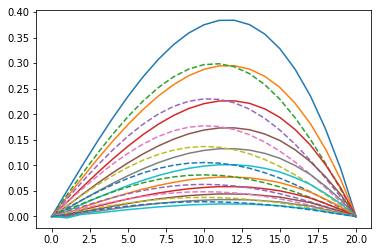

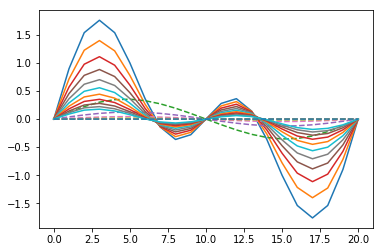

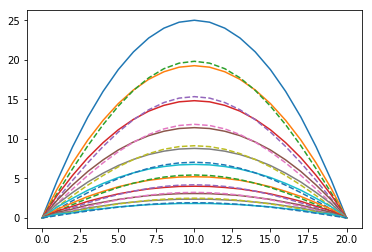

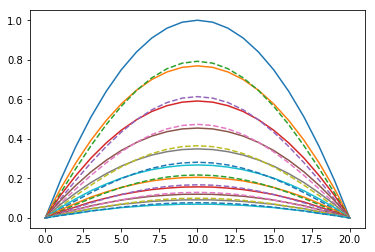

In [25]:
for j in range(Ntraj):
    do_a_path(j)

In [0]:
list(model.parameters())

[Parameter containing:
 tensor([[[-0.1866,  0.1391, -0.1865]]], requires_grad=True),
 Parameter containing:
 tensor([-0.0019], requires_grad=True)]

NameError: ignored